In [13]:
import sys
import pandas as pd
import sklearn
from sklearn.feature_selection import r_regression
import matplotlib.pyplot as plt 

In [14]:

#import matplotlib.pyplot as plt
path = '/home/shared/kunchaya/data/must-c-v1/en-de/result/'
dataset = 'tst-COMMON'

In [15]:
#bleu, chrf, ter score
bleu_metric = pd.read_csv(path + dataset+ '/bleu.txt', names = ["bleu score"])
chrf_metric = pd.read_csv(path + dataset+ '/chrf.txt', sep = "=" , names = ["setup","chrf score"])
ter_metric = pd.read_csv(path + dataset+ '/ter.txt',sep = "=" , names = ["setup","ter score"])

#extract coment score
comet_metric = pd.read_csv(path + dataset+ '/comet.txt', sep = ' ', header = None, names=["filename", "line", "comet score"])
comet_metric.drop(comet_metric.tail(1).index,inplace=True) #drop last 1 row

#geting decoder confidence score
decoder_confi = pd.read_csv(path + dataset+'/decoder_confi.txt', header = None, names = ['decoder confident score'])

In [16]:
print(bleu_metric)
print(chrf_metric)
print(ter_metric)
print(comet_metric)

      bleu score
0        13.2994
1        13.5177
2        44.3001
3        11.5393
4        10.0537
...          ...
2579     10.6073
2580     13.3041
2581     47.7235
2582     20.2809
2583     27.3793

[2584 rows x 1 columns]
                                                  setup  chrf score
0     chrF2|nrefs:1|case:mixed|eff:yes|nc:6|nw:0|spa...     44.1171
1     chrF2|nrefs:1|case:mixed|eff:yes|nc:6|nw:0|spa...     40.5562
2     chrF2|nrefs:1|case:mixed|eff:yes|nc:6|nw:0|spa...     62.8231
3     chrF2|nrefs:1|case:mixed|eff:yes|nc:6|nw:0|spa...     40.9676
4     chrF2|nrefs:1|case:mixed|eff:yes|nc:6|nw:0|spa...     50.2508
...                                                 ...         ...
2579  chrF2|nrefs:1|case:mixed|eff:yes|nc:6|nw:0|spa...     52.9120
2580  chrF2|nrefs:1|case:mixed|eff:yes|nc:6|nw:0|spa...     57.6072
2581  chrF2|nrefs:1|case:mixed|eff:yes|nc:6|nw:0|spa...     69.2743
2582  chrF2|nrefs:1|case:mixed|eff:yes|nc:6|nw:0|spa...     54.7263
2583  chrF2|nrefs:1|cas

In [17]:

#calculating pearson colloreation of bleu, chrf, ter and comet
#bleu, chrf, ter
bleu_p = r_regression(decoder_confi, bleu_metric.values.ravel())
chrf_p = r_regression(decoder_confi, chrf_metric.iloc[:,-1:].values.ravel())
ter_p = r_regression(decoder_confi, ter_metric.iloc[:,-1:].values.ravel())

#comet
comet_p = r_regression(decoder_confi, comet_metric.iloc[:,-1:].values.ravel()) 

In [18]:
# make it absolute value and into percent

Note that we care about the magnitude (absolute value) of the correlation and not whether it is positive or negative. For example, TER is expected to correlate negatively with human ranking because higher TER means more errors while higher metric score mean higher translation quality. (zouhar et al. 2022)

In [19]:
pearson = [bleu_p*100, chrf_p*100, ter_p*100, comet_p*100] #make it into percent
index = ['BLEU', 'Chrf', 'Ter',
         'COMET' ]
df = pd.DataFrame({'Pearson Correlation (%)':pearson}, index = index)
df['Pearson Correlation (%)'] = df['Pearson Correlation (%)'].astype(float).abs() #changes data type to float and absolute value

In [20]:
print(df)

       Pearson Correlation (%)
BLEU                 48.085786
Chrf                 55.646506
Ter                  45.560206
COMET                62.968344


decoder confidence have n(%) correlation with each automatic metrics

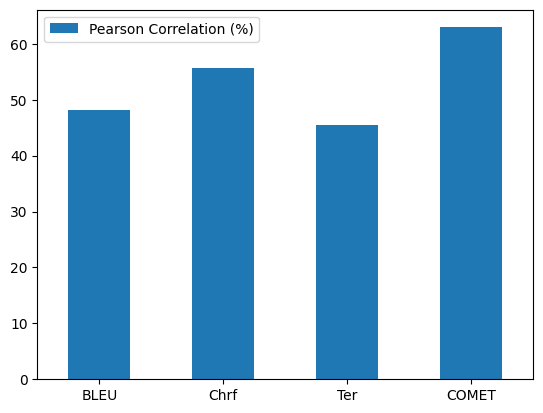

In [21]:
ax = df.plot.bar(y='Pearson Correlation (%)', rot=0)

Making scatter plot for bleu/chrf/ter/comet and decoder confident score (BLEU and decoder confidence score range 0-100). NOTE: decoder confident score is measure as probability(%)

In [22]:

df_bleu = pd.concat([bleu_metric, decoder_confi.rpow(2).mul(100)], axis=1)
df_comet = pd.concat([comet_metric, decoder_confi.rpow(2).mul(100)], axis=1) 
df_chrf = pd.concat([chrf_metric, decoder_confi.rpow(2).mul(100)], axis=1)
df_ter = pd.concat([ter_metric, decoder_confi.rpow(2).mul(100)], axis=1)






In [23]:
print(df_bleu)
print(df_chrf)
print(df_ter)
print(df_comet)

      bleu score  decoder confident score
0        13.2994                60.368231
1        13.5177                46.968246
2        44.3001                69.855242
3        11.5393                56.517035
4        10.0537                42.846941
...          ...                      ...
2579     10.6073                59.020933
2580     13.3041                52.557509
2581     47.7235                59.186281
2582     20.2809                54.485895
2583     27.3793                62.140170

[2584 rows x 2 columns]
                                                  setup  chrf score  \
0     chrF2|nrefs:1|case:mixed|eff:yes|nc:6|nw:0|spa...     44.1171   
1     chrF2|nrefs:1|case:mixed|eff:yes|nc:6|nw:0|spa...     40.5562   
2     chrF2|nrefs:1|case:mixed|eff:yes|nc:6|nw:0|spa...     62.8231   
3     chrF2|nrefs:1|case:mixed|eff:yes|nc:6|nw:0|spa...     40.9676   
4     chrF2|nrefs:1|case:mixed|eff:yes|nc:6|nw:0|spa...     50.2508   
...                                          

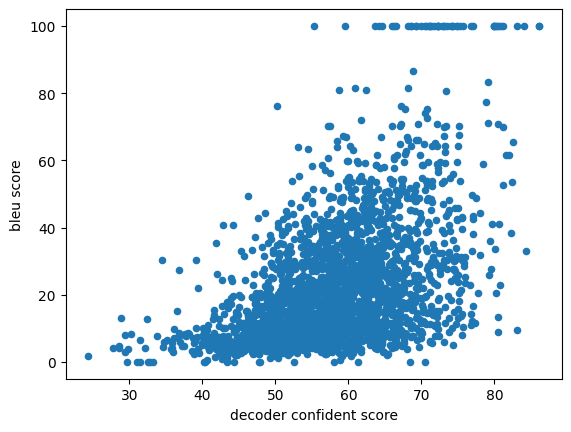

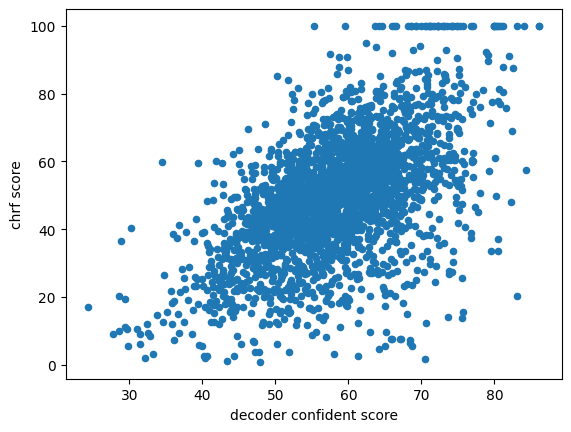

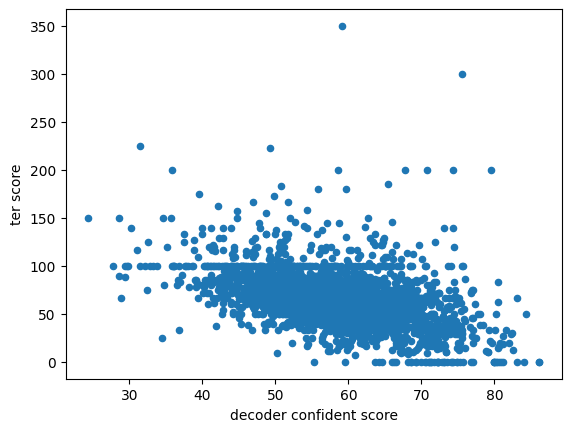

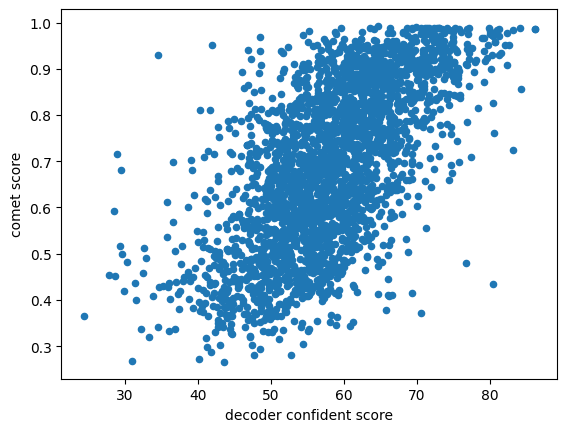

In [24]:
ax_belu = df_bleu.plot.scatter(x= 'decoder confident score' , y = 'bleu score')
ax_chrf = df_chrf.plot.scatter(x= 'decoder confident score' , y = 'chrf score')
ax_ter = df_ter.plot.scatter(x= 'decoder confident score' , y = 'ter score')
ax_comet = df_comet.plot.scatter(x= 'decoder confident score' , y = 'comet score')
